In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


# Loading and Downloading Dataset

In [61]:
df = pd.read_csv('../input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
tst_df = pd.read_csv('../input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [62]:
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


# Data Preprocessing

In [63]:
# checking statistical info about data
df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [64]:
# checking data type details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [65]:
# checing null values
df.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [66]:
# replacing null values with mode and median for categorical and numerical variable respectively
for col in df.dtypes.index:
    if df.dtypes[col] == 'object':
        df.fillna(df[col].mode(), inplace=True)
    else:
        df.fillna(df[col].median(), inplace=True)

In [67]:
# # replacing null values with mode
# df.fillna(modes, inplace=True)

In [68]:
df.isnull().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
OS                                 0
SearchEngine                       0
Zone                               0
Type of Traffic                    0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
Made_Purchase                      0
dtype: int64

# Analysing Dataset

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
cat_col = []
for col in df.dtypes.index:
    if df.dtypes[col] == 'object':
        cat_col.append(col)
cat_col

['Month_SeasonalPurchase',
 'CustomerType',
 'Gender',
 'Cookies Setting',
 'Education',
 'Marital Status']

In [71]:
cont_col = []
for col in df.dtypes.index:
    if df.dtypes[col] != 'object':
        cont_col.append(col)
cont_col.remove('Made_Purchase')
cont_col

['HomePage',
 'HomePage_Duration',
 'LandingPage',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Exit Rates',
 'GoogleMetric:Page Values',
 'SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type of Traffic',
 'WeekendPurchase']

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

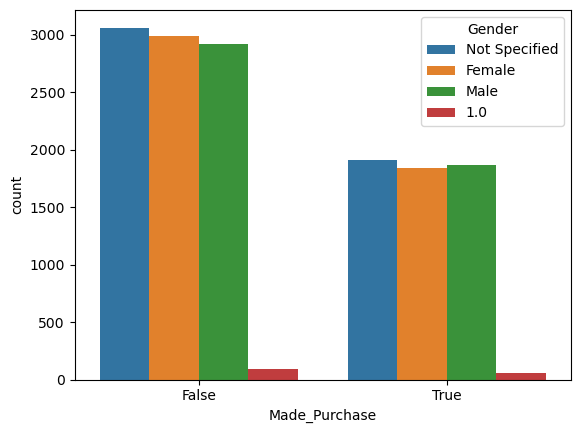

In [72]:
# analysing of categorical dataset
sns.countplot(x = 'Made_Purchase', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

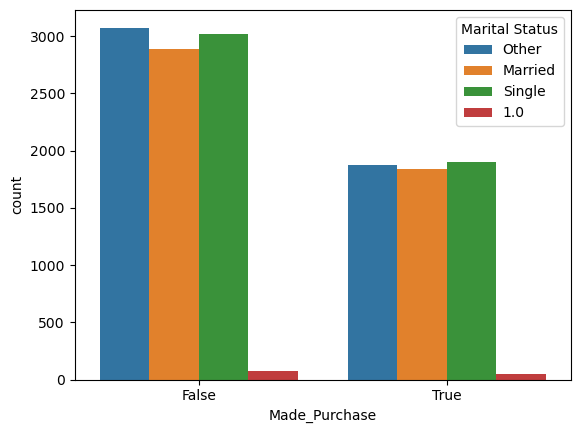

In [73]:
sns.countplot(x = 'Made_Purchase', hue = 'Marital Status', data = df)

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

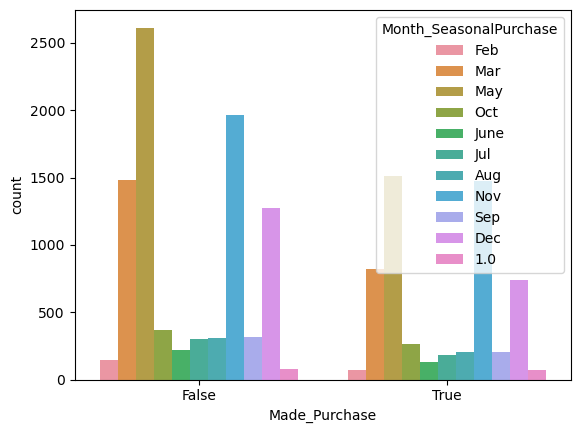

In [74]:
sns.countplot(x = 'Made_Purchase', hue = 'Month_SeasonalPurchase', data = df)

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

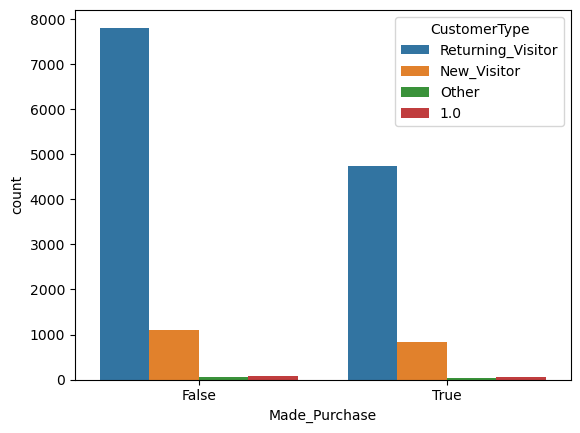

In [75]:
sns.countplot(x = 'Made_Purchase', hue = 'CustomerType', data = df)

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

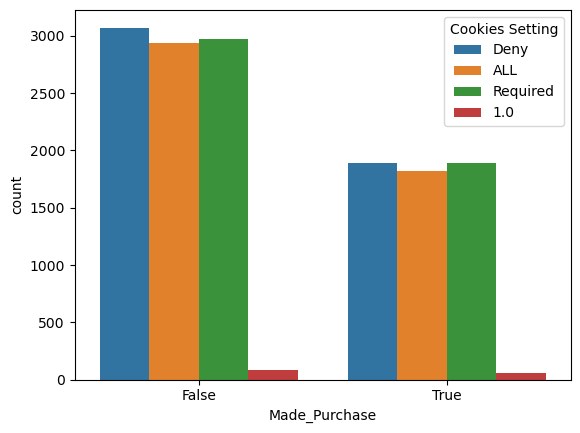

In [76]:
sns.countplot(x = 'Made_Purchase', hue = 'Cookies Setting', data = df)

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

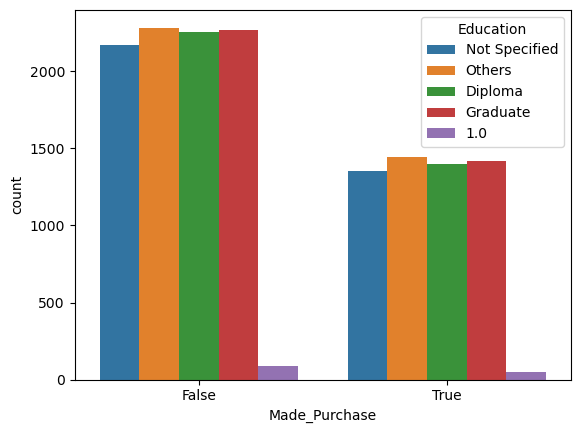

In [77]:
sns.countplot(x = 'Made_Purchase', hue = 'Education', data = df)

<AxesSubplot:xlabel='WeekendPurchase', ylabel='count'>

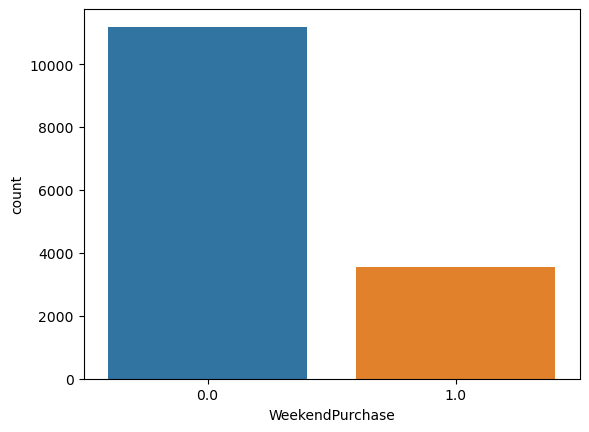

In [78]:
sns.countplot(x = 'WeekendPurchase', data=df)

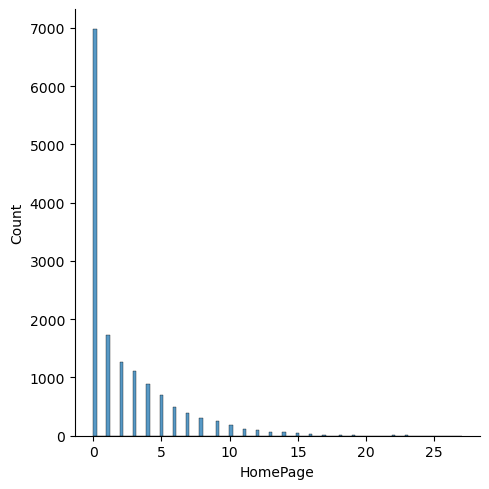

In [79]:
sns.displot(data=df, x = 'HomePage')

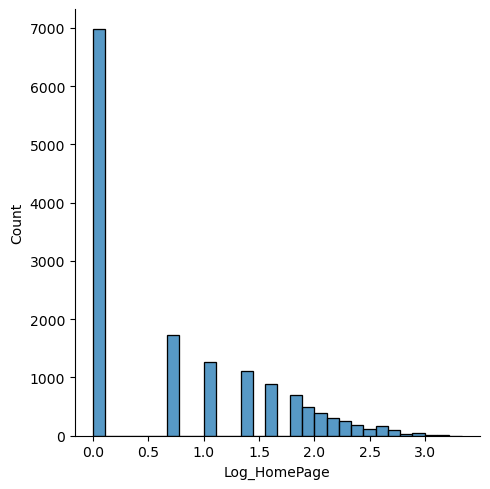

In [80]:
df['Log_HomePage'] = np.log1p(df['HomePage'])
sns.displot(data=df, x = 'Log_HomePage')

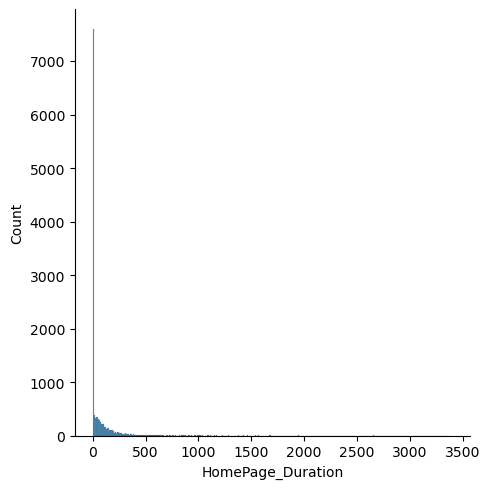

In [81]:
# analysing numerical variables
sns.displot(data=df, x = 'HomePage_Duration')

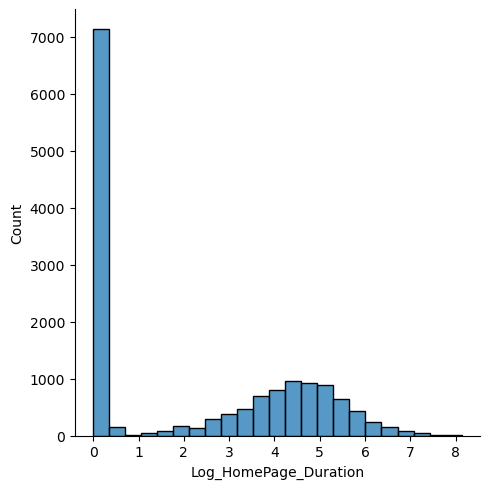

In [82]:
# log transformation of numerical variable 
df['Log_HomePage_Duration'] = np.log1p(df['HomePage_Duration'])
sns.displot(data=df, x = 'Log_HomePage_Duration')

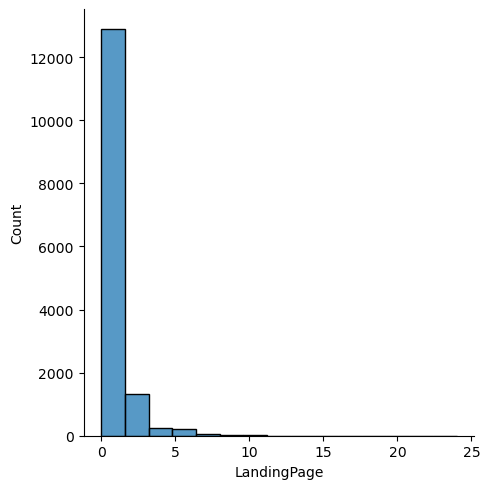

In [83]:
sns.displot(data=df, x = 'LandingPage')

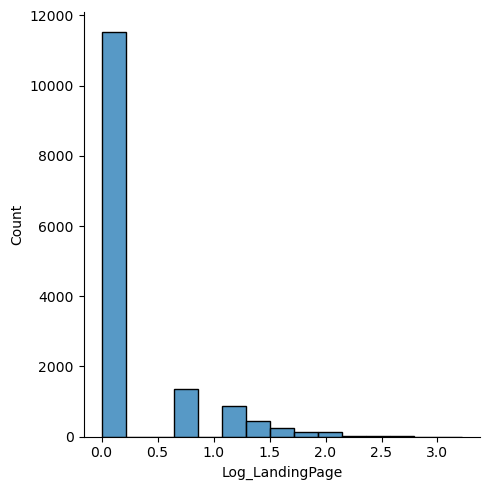

In [84]:
df['Log_LandingPage'] = np.log1p(df['LandingPage'] )
sns.displot(data=df, x = 'Log_LandingPage')

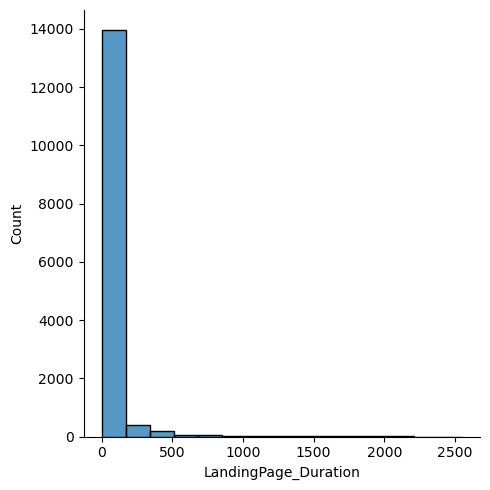

In [85]:
sns.displot(data=df, x = 'LandingPage_Duration')

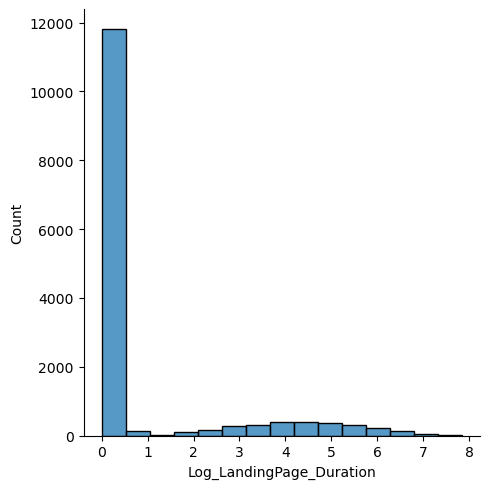

In [86]:
df['Log_LandingPage_Duration'] = np.log1p(df['LandingPage_Duration'])
sns.displot(data=df, x = 'Log_LandingPage_Duration')

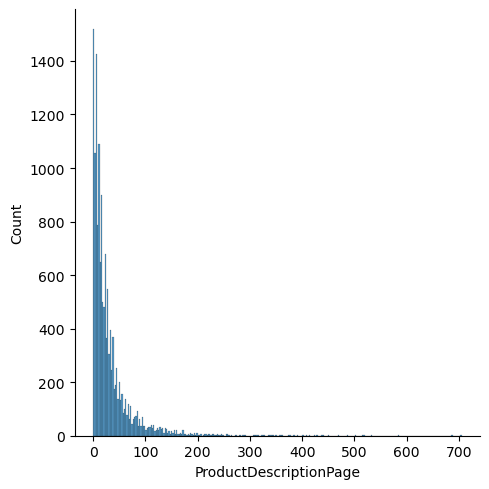

In [87]:
sns.displot(data=df, x = 'ProductDescriptionPage')

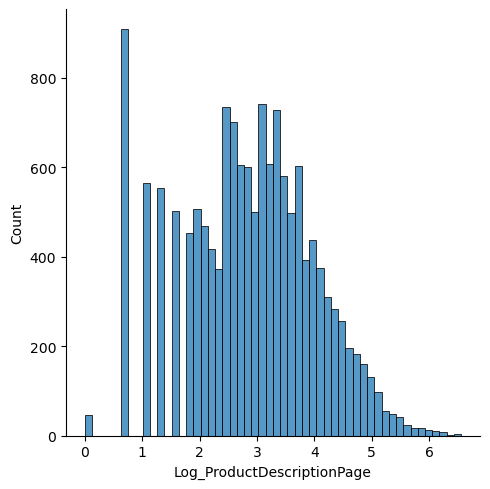

In [88]:
df['Log_ProductDescriptionPage'] = np.log1p(df['ProductDescriptionPage'])
sns.displot(data=df, x = 'Log_ProductDescriptionPage')

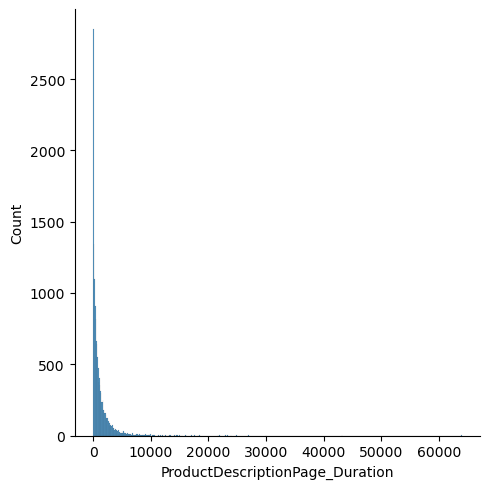

In [89]:
sns.displot(data=df, x = 'ProductDescriptionPage_Duration')

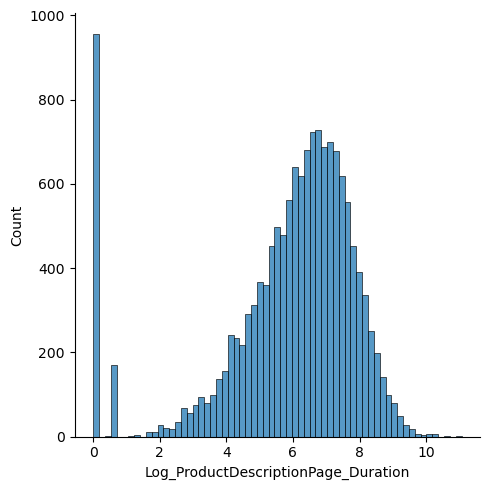

In [90]:
df['Log_ProductDescriptionPage_Duration'] = np.log1p(df['ProductDescriptionPage_Duration'])
sns.displot(data=df, x = 'Log_ProductDescriptionPage_Duration')

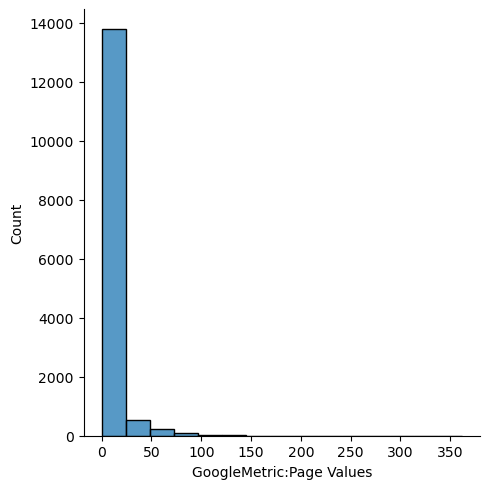

In [91]:
sns.displot(data=df, x = 'GoogleMetric:Page Values')

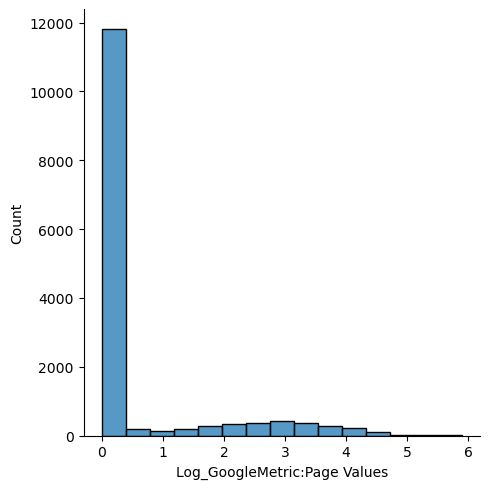

In [92]:
df['Log_GoogleMetric:Page Values'] = np.log1p(df['GoogleMetric:Page Values'])
sns.displot(data=df, x = 'Log_GoogleMetric:Page Values')

In [93]:
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Marital Status,WeekendPurchase,Made_Purchase,Log_HomePage,Log_HomePage_Duration,Log_LandingPage,Log_LandingPage_Duration,Log_ProductDescriptionPage,Log_ProductDescriptionPage_Duration,Log_GoogleMetric:Page Values
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,Other,0.0,False,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,Married,0.0,False,0.000000,0.0,0.0,0.0,1.098612,1.299283,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,Married,1.0,False,0.000000,0.0,0.0,0.0,2.397895,6.443336,0.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,Single,0.0,False,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,Other,1.0,False,0.693147,0.0,0.0,0.0,0.000000,0.000000,0.0


In [94]:
df.drop(columns=['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Page Values'], axis=1, inplace=True)
df.head()

,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,...,Marital Status,WeekendPurchase,Made_Purchase,Log_HomePage,Log_HomePage_Duration,Log_LandingPage,Log_LandingPage_Duration,Log_ProductDescriptionPage,Log_ProductDescriptionPage_Duration,Log_GoogleMetric:Page Values
0,0.20,0.20,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,Not Specified,...,Other,0.0,False,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.0
1,0.05,0.14,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,Female,...,Married,0.0,False,0.000000,0.0,0.0,0.0,1.098612,1.299283,0.0
2,0.02,0.05,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,Female,...,Married,1.0,False,0.000000,0.0,0.0,0.0,2.397895,6.443336,0.0
3,0.20,0.20,0.4,Feb,2.0,4.0,3.0,3.0,Returning_Visitor,Male,...,Single,0.0,False,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.0
4,0.20,0.20,0.0,Feb,1.0,2.0,1.0,5.0,Returning_Visitor,Male,...,Other,1.0,False,0.693147,0.0,0.0,0.0,0.000000,0.000000,0.0


# OneHotEncoding

In [95]:
sex = pd.get_dummies(df['Gender'], drop_first=True)
sex.head()

,Female,Male,Not Specified
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [96]:
ms = pd.get_dummies(df['Marital Status'], drop_first=True)
ms.head()

,Married,Other,Single
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [97]:
ct = pd.get_dummies(df['CustomerType'], drop_first=True)
ct.head()

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [98]:
cs = pd.get_dummies(df['Cookies Setting'], drop_first=True)
cs.head()

,ALL,Deny,Required
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [99]:
edu = pd.get_dummies(df['Education'], drop_first=True)
edu.head()

,Diploma,Graduate,Not Specified,Others
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [100]:
msp = pd.get_dummies(df['Month_SeasonalPurchase'], drop_first=True)
msp.head()

,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [101]:
df = pd.concat([df, sex, edu, ms, msp, cs, ct], axis = 1)
df.drop(['Gender', 'Marital Status', 'Month_SeasonalPurchase', 'CustomerType', 'Cookies Setting', 'Education'], axis = 1, inplace=True)
df.head()

,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase,Made_Purchase,Log_HomePage,...,May,Nov,Oct,Sep,ALL,Deny,Required,New_Visitor,Other,Returning_Visitor
0,0.20,0.20,0.0,4.0,1.0,9.0,3.0,0.0,False,0.000000,...,0,0,0,0,0,1,0,0,0,1
1,0.05,0.14,0.0,3.0,2.0,2.0,4.0,0.0,False,0.000000,...,0,0,0,0,0,1,0,0,0,1
2,0.02,0.05,0.0,3.0,3.0,1.0,4.0,1.0,False,0.000000,...,0,0,0,0,1,0,0,0,0,1
3,0.20,0.20,0.4,2.0,4.0,3.0,3.0,0.0,False,0.000000,...,0,0,0,0,1,0,0,0,0,1
4,0.20,0.20,0.0,1.0,2.0,1.0,5.0,1.0,False,0.693147,...,0,0,0,0,0,1,0,0,0,1


# Defining Input-Output

In [102]:
X = df.drop('Made_Purchase', axis=1)
y = df['Made_Purchase']

# Train Test Data Split

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.14161136,  0.4460942 , -0.3300974 , ..., -0.38565522,
        -0.08953448,  0.41453312],
       [ 0.14161136,  0.04768048, -0.3300974 , ..., -0.38565522,
        -0.08953448,  0.41453312],
       [-0.12569303, -0.15895162, -0.3300974 , ..., -0.38565522,
        -0.08953448,  0.41453312],
       ...,
       [-0.29900027, -0.40385506, -0.3300974 , ..., -0.38565522,
        -0.08953448,  0.41453312],
       [-0.29900027,  0.12736323, -0.3300974 , ..., -0.38565522,
        -0.08953448,  0.41453312],
       [-0.26861326, -0.38920076, -0.3300974 , ..., -0.38565522,
        -0.08953448,  0.41453312]])

In [105]:
scaler.fit_transform(X_test)

array([[-0.31376381, -0.47781042, -0.33339408, ..., -0.39248821,
        -0.08266627,  0.42231794],
       [ 1.6419781 ,  1.54691297, -0.33339408, ..., -0.39248821,
        -0.08266627,  0.42231794],
       [-0.31376381, -0.08217482, -0.33339408, ..., -0.39248821,
        -0.08266627,  0.42231794],
       ...,
       [-0.26224084, -0.37200596, -0.33339408, ..., -0.39248821,
        -0.08266627,  0.42231794],
       [-0.27301918, -0.30005937, -0.33339408, ..., -0.39248821,
        -0.08266627,  0.42231794],
       [-0.19872017, -0.05992887,  2.4158631 , ..., -0.39248821,
        -0.08266627,  0.42231794]])

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [107]:
preds = model.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, preds)
acc_score

0.6751131221719457

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm

array([[2516,  241],
       [1195,  468]])

# Changes In Test Data

In [110]:
tst_df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [111]:
# replacing null values with mode and median for categorical and numerical variable respectively
for col in tst_df.dtypes.index:
    if tst_df.dtypes[col] == 'object':
        tst_df.fillna(tst_df[col].mode(), inplace=True)
    else:
        tst_df.fillna(tst_df[col].median(), inplace=True)

In [112]:
tst_df['Log_HomePage'] = np.log1p(tst_df['HomePage'])
tst_df['Log_HomePage_Duration'] = np.log1p(tst_df['HomePage_Duration'])
tst_df['Log_LandingPage'] = np.log1p(tst_df['LandingPage']+1)
tst_df['Log_LandingPage_Duration'] = np.log1p(tst_df['LandingPage_Duration'])
tst_df['Log_ProductDescriptionPage_Duration'] = np.log1p(tst_df['ProductDescriptionPage_Duration'])
tst_df['Log_ProductDescriptionPage'] = np.log1p(tst_df['ProductDescriptionPage'])
tst_df['Log_GoogleMetric:Page Values'] = np.log1p(tst_df['GoogleMetric:Page Values'])

In [113]:
tst_df.drop(columns=['GoogleMetric:Page Values', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'LandingPage_Duration', 'HomePage_Duration', 'HomePage', 'LandingPage'], axis=1, inplace=True)
tst_df.head()

,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,...,Education,Marital Status,WeekendPurchase,Log_HomePage,Log_HomePage_Duration,Log_LandingPage,Log_LandingPage_Duration,Log_ProductDescriptionPage_Duration,Log_ProductDescriptionPage,Log_GoogleMetric:Page Values
0,0.200000,0.200000,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,...,Not Specified,Single,0.0,0.0,0.0,0.693147,0.0,0.000000,0.693147,0.0
1,0.000000,0.100000,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,...,Graduate,Married,0.0,0.0,0.0,0.693147,0.0,4.174387,1.098612,0.0
2,0.015789,0.024561,0.0,Feb,2.0,2.0,1.0,3.0,Returning_Visitor,Female,...,Diploma,Other,0.0,0.0,0.0,0.693147,0.0,5.044822,2.995732,0.0
3,0.000000,0.100000,0.8,Feb,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,...,Graduate,Other,0.0,0.0,0.0,0.693147,0.0,3.637586,1.098612,0.0
4,0.018750,0.025833,0.4,Feb,1.0,1.0,4.0,3.0,Returning_Visitor,Female,...,Others,Other,0.0,0.0,0.0,0.693147,0.0,6.013104,2.833213,0.0


In [114]:
sex = pd.get_dummies(tst_df['Gender'], drop_first=True)
ms = pd.get_dummies(tst_df['Marital Status'], drop_first=True)
ct = pd.get_dummies(tst_df['CustomerType'], drop_first=True)
cs = pd.get_dummies(tst_df['Cookies Setting'], drop_first=True)
edu = pd.get_dummies(tst_df['Education'], drop_first=True)
msp = pd.get_dummies(tst_df['Month_SeasonalPurchase'], drop_first=True)

In [115]:
tst_df = pd.concat([tst_df, sex, edu, ms, msp, cs, ct], axis = 1)
tst_df.drop(['Gender', 'Marital Status', 'Month_SeasonalPurchase', 'CustomerType', 'Cookies Setting', 'Education'], axis = 1, inplace=True)
tst_df.head()

,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase,Log_HomePage,Log_HomePage_Duration,...,May,Nov,Oct,Sep,ALL,Deny,Required,New_Visitor,Other,Returning_Visitor
0,0.200000,0.200000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0.000000,0.100000,0.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2,0.015789,0.024561,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
3,0.000000,0.100000,0.8,2.0,2.0,2.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,0.018750,0.025833,0.4,1.0,1.0,4.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [116]:
scaler.fit_transform(tst_df)

array([[ 1.54636266,  1.54032512, -0.32698015, ..., -0.39509076,
        -0.07302133,  0.42609593],
       [-0.29640653,  0.50471651, -0.32698015, ..., -0.39509076,
        -0.07302133,  0.42609593],
       [-0.15092474, -0.27653209, -0.32698015, ..., -0.39509076,
        -0.07302133,  0.42609593],
       ...,
       [-0.27081251, -0.43637228,  2.4488458 , ..., -0.39509076,
        -0.07302133,  0.42609593],
       [ 0.31784987,  0.84991937, -0.32698015, ..., -0.39509076,
        -0.07302133,  0.42609593],
       [-0.29640653, -0.0130878 , -0.32698015, ..., -0.39509076,
        -0.07302133,  0.42609593]])

In [117]:
preds = model.predict(tst_df)
preds

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([False, False, False, ..., False, False, False])

In [118]:
tst_df['id'] = tst_df.index

In [119]:
tst_df['Made_Purchase'] = preds
sub_df = tst_df[['id', 'Made_Purchase']]
sub_df.to_csv('sample_submission.csv', index=False)

In [120]:
!head sample_submission.csv

id,Made_Purchase
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
